In [7]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.api import VAR
from scipy.stats import pearsonr

In [8]:
data = pd.read_csv('agg_output.csv')

In [9]:
features = ['Alkalinity to pH 4.5 as CaCO3', 'Ammonia un-ionised as N', 'Nitrite as N', 'Nitrogen, Total Oxidised as N', 'Orthophosphate, reactive as P', 'Oxygen, Dissolved as O2','Oxygen, Dissolved, % Saturation', 'pH']

In [10]:
data = data.sort_values('date')
data = data[features+['date']]
data.index = pd.to_datetime(data['date'])
data = data[features]
data

,Alkalinity to pH 4.5 as CaCO3,Ammonia un-ionised as N,Nitrite as N,"Nitrogen, Total Oxidised as N","Orthophosphate, reactive as P","Oxygen, Dissolved as O2","Oxygen, Dissolved, % Saturation",pH
date,,,,,,,,
2000-01-06,222.0,0.00100,0.0630,10.90,0.429,12.51,103.4,8.10
2000-01-10,185.0,0.00100,0.0110,10.80,0.020,11.90,98.8,8.20
2000-01-10,189.0,0.00100,0.0090,9.76,0.020,11.80,94.3,8.20
2000-01-10,186.0,0.00100,0.0090,9.56,0.020,11.80,95.0,8.20
2000-01-12,79.0,0.00100,0.0570,4.31,1.360,10.95,90.8,7.60
...,...,...,...,...,...,...,...,...
2023-07-11,200.0,0.00077,0.0100,6.50,0.052,9.84,97.0,8.08
2023-07-14,250.0,0.00041,0.0210,7.80,0.031,10.40,97.6,7.79
2023-07-19,220.0,0.00025,0.0250,1.50,0.230,5.03,51.4,7.45


In [11]:
type(data.index[0])

pandas._libs.tslibs.timestamps.Timestamp

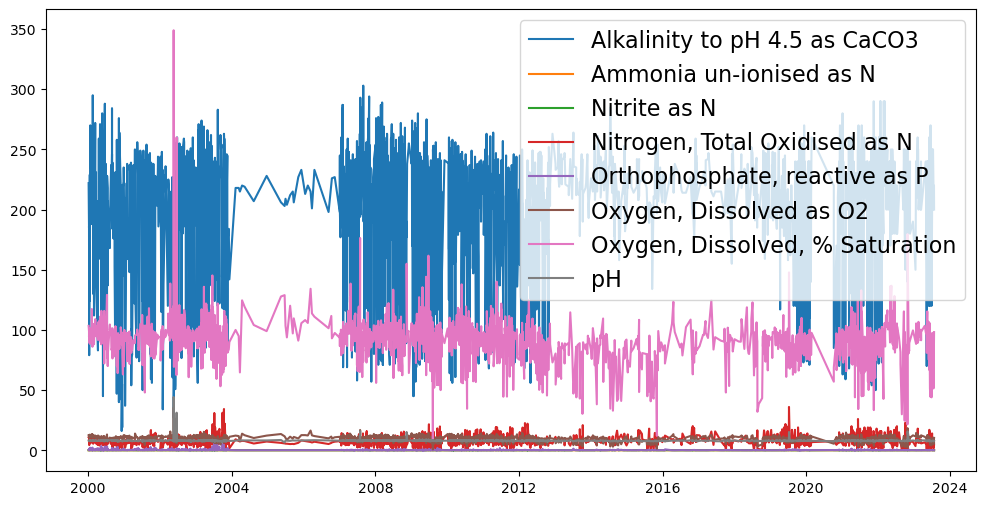

In [12]:
plt.figure(figsize=(12,6))
columns = []
for col in data.columns:
    column, = plt.plot(data[col])
    columns.append(column)

plt.legend(features, fontsize=16)

In [13]:
avgs = data.mean()
devs = data.std()

In [14]:
for col in data:
    data[col] = (data[col] - avgs.loc[col]) / devs.loc[col]

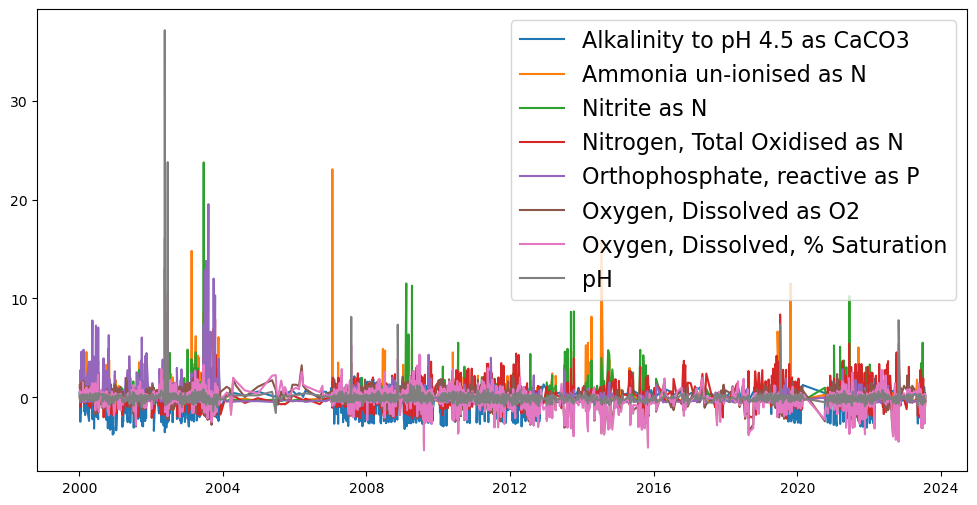

In [15]:
plt.figure(figsize=(12,6))
columns = []
for col in data.columns:
    column, = plt.plot(data[col])
    columns.append(column)

plt.legend(features, fontsize=16)

In [16]:
data = data.diff().dropna()

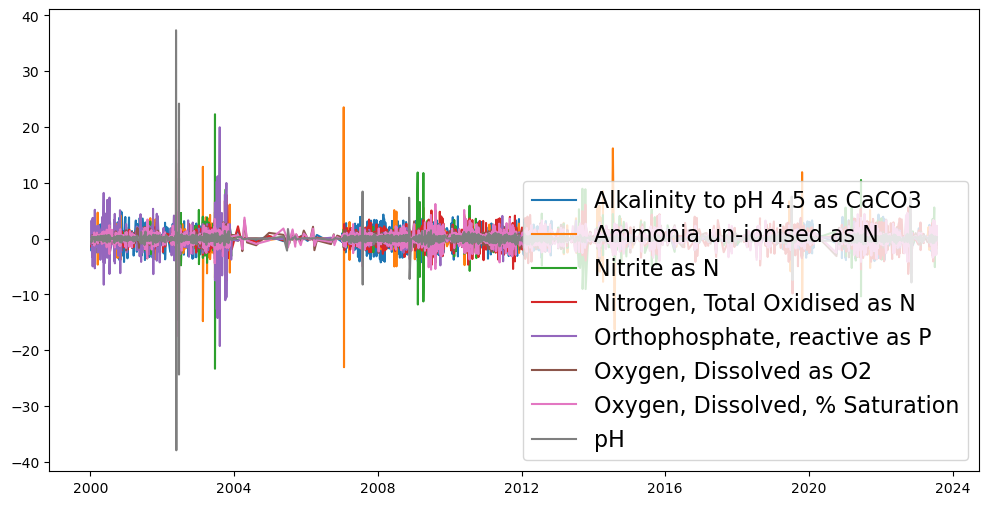

In [17]:
plt.figure(figsize=(12,6))
columns = []
for col in data.columns:
    column, = plt.plot(data[col])
    columns.append(column)

plt.legend(features, fontsize=16)

In [18]:
annual_volatility = data.groupby(data.index.year).std()

In [19]:
annual_volatility

,Alkalinity to pH 4.5 as CaCO3,Ammonia un-ionised as N,Nitrite as N,"Nitrogen, Total Oxidised as N","Orthophosphate, reactive as P","Oxygen, Dissolved as O2","Oxygen, Dissolved, % Saturation",pH
date,,,,,,,,
2000,1.497567,0.969497,0.552143,0.715335,2.210733,0.690296,0.714707,0.287331
2001,1.915906,0.982659,0.833358,1.041944,1.795511,0.980197,0.966390,0.448335
2002,1.447197,0.697696,0.897103,0.857193,1.076340,2.177279,2.517679,5.050417
2003,1.238811,2.139067,2.845406,1.838219,3.263376,1.003608,1.118606,0.423296
2004,0.612356,0.171209,0.154661,0.938499,0.152871,1.778378,1.794476,0.162208
2005,0.249538,0.204011,0.063142,0.268403,0.070289,1.007816,1.312702,0.995210
2006,0.427516,0.061343,0.078861,0.254756,0.080173,1.193368,0.942583,0.111961
2007,1.278181,2.348192,0.492828,0.943428,0.488065,0.808294,0.951246,0.873799
2008,1.390316,0.774009,0.498539,0.952296,0.569274,0.733299,0.823813,0.746798


In [20]:

for col in data.columns:
    data[f'{col}_annual_vol'] = data.index.map(lambda d: annual_volatility.loc[d.year, col])

In [21]:
data

,Alkalinity to pH 4.5 as CaCO3,Ammonia un-ionised as N,Nitrite as N,"Nitrogen, Total Oxidised as N","Orthophosphate, reactive as P","Oxygen, Dissolved as O2","Oxygen, Dissolved, % Saturation",pH,Alkalinity to pH 4.5 as CaCO3_annual_vol,Ammonia un-ionised as N_annual_vol,Nitrite as N_annual_vol,"Nitrogen, Total Oxidised as N_annual_vol","Orthophosphate, reactive as P_annual_vol","Oxygen, Dissolved as O2_annual_vol","Oxygen, Dissolved, % Saturation_annual_vol",pH_annual_vol
date,,,,,,,,,,,,,,,,
2000-01-10,-0.759511,0.000000,-0.717696,-0.029447,-0.990136,-0.315767,-0.288919,0.102336,1.497567,0.969497,0.552143,0.715335,2.210733,0.690296,0.714707,0.287331
2000-01-10,0.082109,0.000000,-0.027604,-0.306244,0.000000,-0.051765,-0.282638,0.000000,1.497567,0.969497,0.552143,0.715335,2.210733,0.690296,0.714707,0.287331
2000-01-10,-0.061582,0.000000,0.000000,-0.058893,0.000000,0.000000,0.043966,0.000000,1.497567,0.969497,0.552143,0.715335,2.210733,0.690296,0.714707,0.287331
2000-01-12,-2.196423,0.000000,0.662488,-1.545945,3.243966,-0.440003,-0.263796,-0.614018,1.497567,0.969497,0.552143,0.715335,2.210733,0.690296,0.714707,0.287331
2000-01-17,2.689078,0.000000,-0.717696,1.242645,-3.243966,-0.336473,-0.125617,0.102336,1.497567,0.969497,0.552143,0.715335,2.210733,0.690296,0.714707,0.287331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-11,0.000000,-0.046576,-0.069009,-0.029447,-0.261454,0.326120,0.188426,-0.092103,1.080476,0.462192,1.314889,1.342698,0.303461,1.168066,1.268203,0.387010
2023-07-14,1.026366,-0.186306,0.151820,0.382805,-0.050838,0.289885,0.037685,-0.296775,1.080476,0.462192,1.314889,1.342698,0.303461,1.168066,1.268203,0.387010
2023-07-19,-0.615819,-0.082803,0.055207,-1.855133,0.481753,-2.779787,-2.901755,-0.347943,1.080476,0.462192,1.314889,1.342698,0.303461,1.168066,1.268203,0.387010


In [22]:

for feature in features:
    data[feature] = data[feature]/data[f'{feature}_annual_vol']

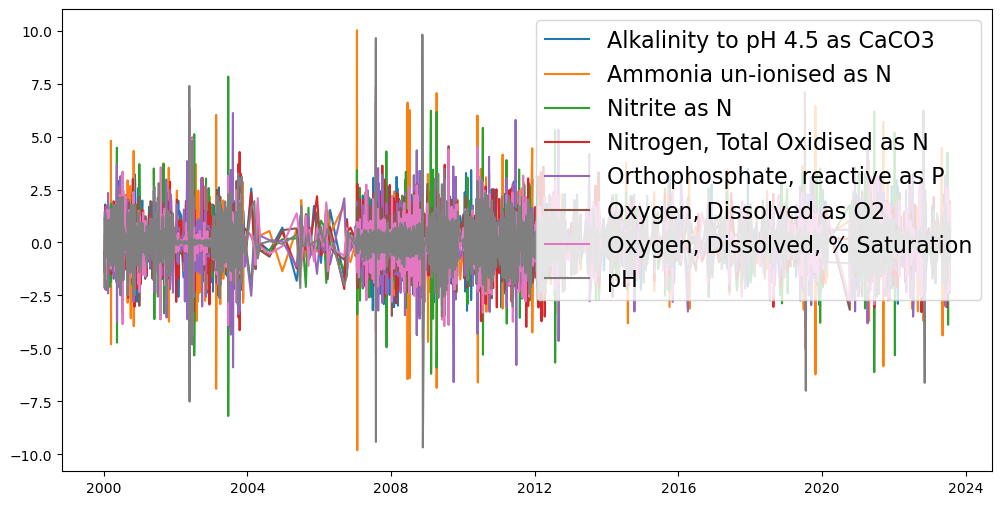

In [24]:
plt.figure(figsize=(12,6))
columns = []
for feature in features:
    column, = plt.plot(data[feature])
    columns.append(column)

plt.legend(features, fontsize=16)

# Remove Seasonality

In [25]:
month_avgs = data.groupby(data.index.month).mean()

In [26]:
print(month_avgs)

      Alkalinity to pH 4.5 as CaCO3  Ammonia un-ionised as N  Nitrite as N  \
date                                                                         
1                         -0.046694                 0.001622     -0.015166   
2                          0.046848                -0.017272     -0.007233   
3                         -0.006564                 0.005689     -0.010741   
4                         -0.005608                 0.008578      0.006825   
5                         -0.028660                 0.062414      0.028758   
6                          0.010805                -0.025044      0.020432   
7                          0.016982                 0.027553     -0.014082   
8                         -0.028992                -0.047898     -0.042595   
9                         -0.016669                 0.028351      0.026742   
10                        -0.009134                -0.008587     -0.027379   
11                         0.042056                -0.031541    

In [27]:

for col in data.columns:
    data[f'{col}_month_avg'] = data.index.map(lambda d: month_avgs.loc[d.month, col])

In [28]:
data

,Alkalinity to pH 4.5 as CaCO3,Ammonia un-ionised as N,Nitrite as N,"Nitrogen, Total Oxidised as N","Orthophosphate, reactive as P","Oxygen, Dissolved as O2","Oxygen, Dissolved, % Saturation",pH,Alkalinity to pH 4.5 as CaCO3_annual_vol,Ammonia un-ionised as N_annual_vol,...,"Oxygen, Dissolved, % Saturation_month_avg",pH_month_avg,Alkalinity to pH 4.5 as CaCO3_annual_vol_month_avg,Ammonia un-ionised as N_annual_vol_month_avg,Nitrite as N_annual_vol_month_avg,"Nitrogen, Total Oxidised as N_annual_vol_month_avg","Orthophosphate, reactive as P_annual_vol_month_avg","Oxygen, Dissolved as O2_annual_vol_month_avg","Oxygen, Dissolved, % Saturation_annual_vol_month_avg",pH_annual_vol_month_avg
date,,,,,,,,,,,,,,,,,,,,,
2000-01-10,-0.507163,0.000000,-1.299837,-0.041165,-0.447877,-0.457438,-0.404249,0.356161,1.497567,0.969497,...,0.008291,0.009648,1.330534,0.996321,1.146229,1.337569,0.970060,1.115952,1.234158,0.845920
2000-01-10,0.054828,0.000000,-0.049994,-0.428113,0.000000,-0.074990,-0.395461,0.000000,1.497567,0.969497,...,0.008291,0.009648,1.330534,0.996321,1.146229,1.337569,0.970060,1.115952,1.234158,0.845920
2000-01-10,-0.041121,0.000000,0.000000,-0.082329,0.000000,0.000000,0.061516,0.000000,1.497567,0.969497,...,0.008291,0.009648,1.330534,0.996321,1.146229,1.337569,0.970060,1.115952,1.234158,0.845920
2000-01-12,-1.466661,0.000000,1.199850,-2.161148,1.467371,-0.637413,-0.369097,-2.136967,1.497567,0.969497,...,0.008291,0.009648,1.330534,0.996321,1.146229,1.337569,0.970060,1.115952,1.234158,0.845920
2000-01-17,1.795631,0.000000,-1.299837,1.737151,-1.467371,-0.487434,-0.175760,0.356161,1.497567,0.969497,...,0.008291,0.009648,1.330534,0.996321,1.146229,1.337569,0.970060,1.115952,1.234158,0.845920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-11,0.000000,-0.100773,-0.052483,-0.021931,-0.861572,0.279197,0.148577,-0.237985,1.080476,0.462192,...,-0.047452,0.014841,1.312690,1.134970,1.239446,1.313659,1.082279,1.109565,1.240834,0.900078
2023-07-14,0.949920,-0.403092,0.115462,0.285102,-0.167528,0.248175,0.029715,-0.766841,1.080476,0.462192,...,-0.047452,0.014841,1.312690,1.134970,1.239446,1.313659,1.082279,1.109565,1.240834,0.900078
2023-07-19,-0.569952,-0.179152,0.041986,-1.381646,1.587527,-2.379820,-2.288084,-0.899055,1.080476,0.462192,...,-0.047452,0.014841,1.312690,1.134970,1.239446,1.313659,1.082279,1.109565,1.240834,0.900078


In [29]:

for feature in features:
    data[feature] = data[feature]-data[f'{feature}_month_avg']

In [30]:
data

,Alkalinity to pH 4.5 as CaCO3,Ammonia un-ionised as N,Nitrite as N,"Nitrogen, Total Oxidised as N","Orthophosphate, reactive as P","Oxygen, Dissolved as O2","Oxygen, Dissolved, % Saturation",pH,Alkalinity to pH 4.5 as CaCO3_annual_vol,Ammonia un-ionised as N_annual_vol,...,"Oxygen, Dissolved, % Saturation_month_avg",pH_month_avg,Alkalinity to pH 4.5 as CaCO3_annual_vol_month_avg,Ammonia un-ionised as N_annual_vol_month_avg,Nitrite as N_annual_vol_month_avg,"Nitrogen, Total Oxidised as N_annual_vol_month_avg","Orthophosphate, reactive as P_annual_vol_month_avg","Oxygen, Dissolved as O2_annual_vol_month_avg","Oxygen, Dissolved, % Saturation_annual_vol_month_avg",pH_annual_vol_month_avg
date,,,,,,,,,,,,,,,,,,,,,
2000-01-10,-0.460469,-0.001622,-1.284671,-0.019254,-0.450678,-0.475676,-0.412540,0.346513,1.497567,0.969497,...,0.008291,0.009648,1.330534,0.996321,1.146229,1.337569,0.970060,1.115952,1.234158,0.845920
2000-01-10,0.101522,-0.001622,-0.034827,-0.406203,-0.002801,-0.093228,-0.403752,-0.009648,1.497567,0.969497,...,0.008291,0.009648,1.330534,0.996321,1.146229,1.337569,0.970060,1.115952,1.234158,0.845920
2000-01-10,0.005572,-0.001622,0.015166,-0.060419,-0.002801,-0.018238,0.053225,-0.009648,1.497567,0.969497,...,0.008291,0.009648,1.330534,0.996321,1.146229,1.337569,0.970060,1.115952,1.234158,0.845920
2000-01-12,-1.419967,-0.001622,1.215016,-2.139238,1.464570,-0.655651,-0.377388,-2.146615,1.497567,0.969497,...,0.008291,0.009648,1.330534,0.996321,1.146229,1.337569,0.970060,1.115952,1.234158,0.845920
2000-01-17,1.842325,-0.001622,-1.284671,1.759062,-1.470172,-0.505672,-0.184051,0.346513,1.497567,0.969497,...,0.008291,0.009648,1.330534,0.996321,1.146229,1.337569,0.970060,1.115952,1.234158,0.845920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-11,-0.016982,-0.128326,-0.038401,0.015732,-0.886364,0.315572,0.196029,-0.252827,1.080476,0.462192,...,-0.047452,0.014841,1.312690,1.134970,1.239446,1.313659,1.082279,1.109565,1.240834,0.900078
2023-07-14,0.932938,-0.430645,0.129544,0.322765,-0.192319,0.284550,0.077167,-0.781683,1.080476,0.462192,...,-0.047452,0.014841,1.312690,1.134970,1.239446,1.313659,1.082279,1.109565,1.240834,0.900078
2023-07-19,-0.586933,-0.206705,0.056068,-1.343983,1.562736,-2.343445,-2.240633,-0.913897,1.080476,0.462192,...,-0.047452,0.014841,1.312690,1.134970,1.239446,1.313659,1.082279,1.109565,1.240834,0.900078


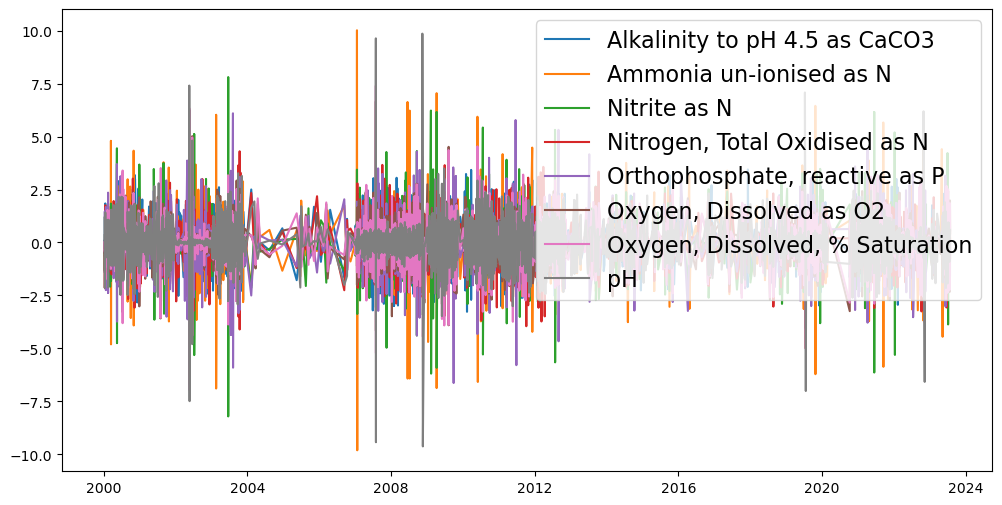

In [31]:
plt.figure(figsize=(12,6))
columns = []
for feature in features:
    column, = plt.plot(data[feature])
    columns.append(column)

plt.legend(features, fontsize=16)

# PACF - Heater

/Users/xl/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


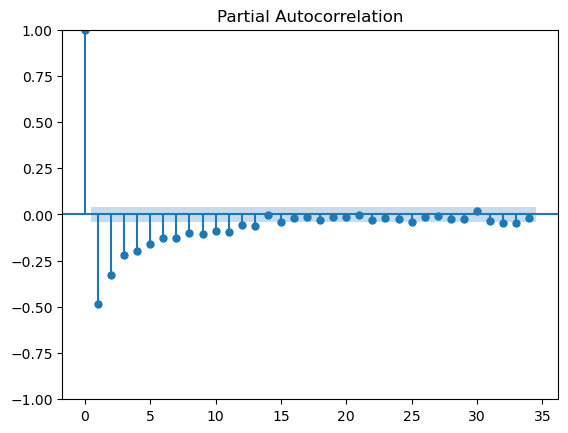

In [32]:
plot_pacf(data['pH'])
plt.show()

# Fit a VAR Model

In [33]:
data = data[features]

In [34]:
model = VAR(data)

/Users/xl/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [35]:
model_fit = model.fit(maxlags=13)

In [36]:
model_fit.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 05, Sep, 2023
Time:                     21:32:28
--------------------------------------------------------------------
No. of Equations:         8.00000    BIC:                   -5.15527
Nobs:                     2367.00    HQIC:                  -6.45733
Log likelihood:          -17504.6    FPE:                0.000744914
AIC:                     -7.20271    Det(Omega_mle):     0.000526386
--------------------------------------------------------------------
Results for equation Alkalinity to pH 4.5 as CaCO3
                                         coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------------------------
const                                      -0.000406         0.016046           -0.025           0.980
L1.Alkalinity to pH 4.5 as CaCO3           -0.80077